In [1]:
# XGBOOST example synthtetic data > 90%

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import glob
import xgboost as xgb
import seaborn as sns


In [3]:
def label_marker(row):
    if isinstance(row['marker'], str) and 'Natural' in row['marker']:
        return 0
    if isinstance(row['marker'], str) and 'Attack' in row['marker']:
        return 1
    return 

In [4]:
path = './synthetic_data/'

input_df = pd.DataFrame()
files = glob.glob(path+"*.csv")
for name in files:
    df = pd.read_csv(name) 
    input_df = pd.concat([input_df, df], ignore_index=True)

input_df = input_df.replace([np.inf, -np.inf], 0)
input_df = input_df.sample(frac=1) # we suffle the dataframe

In [5]:
y_col = 'marker'
X_cols = input_df.loc[:, input_df.columns != y_col].columns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_df[X_cols], input_df[y_col],test_size=0.2, 
                                                    random_state=42)

print(' X_train shape',X_train.shape, '\n', 
      'y_train shape', y_train.shape, '\n',
      'X_test shape',X_test.shape, '\n', 
      'y_test shape', y_test.shape)

 X_train shape (1485518, 128) 
 y_train shape (1485518,) 
 X_test shape (371380, 128) 
 y_test shape (371380,)


In [6]:
from collections import Counter
class_counter = Counter(y_train)
print(' Number of items class 0:', class_counter[0], '\n',
      'Number of items class 1:', class_counter[1])
estimate_imbalancing = class_counter[0]/class_counter[1]
print(' Imbalancing Factor: ',estimate_imbalancing)

 Number of items class 0: 366673 
 Number of items class 1: 1118845
 Imbalancing Factor:  0.32772457310887565


In [7]:
from numpy import nan
XGB = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.30000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3278456267435863,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [8]:
XGB.fit(X_train, y_train,verbose=10)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.30000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3278456267435863,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [9]:
# get importance
importance = XGB.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00278
Feature: 1, Score: 0.00574
Feature: 2, Score: 0.00378
Feature: 3, Score: 0.01754
Feature: 4, Score: 0.00181
Feature: 5, Score: 0.00360
Feature: 6, Score: 0.00262
Feature: 7, Score: 0.00315
Feature: 8, Score: 0.00608
Feature: 9, Score: 0.00445
Feature: 10, Score: 0.00346
Feature: 11, Score: 0.00231
Feature: 12, Score: 0.00171
Feature: 13, Score: 0.00326
Feature: 14, Score: 0.00219
Feature: 15, Score: 0.00124
Feature: 16, Score: 0.00112
Feature: 17, Score: 0.00155
Feature: 18, Score: 0.00401
Feature: 19, Score: 0.00147
Feature: 20, Score: 0.00257
Feature: 21, Score: 0.00234
Feature: 22, Score: 0.00374
Feature: 23, Score: 0.00196
Feature: 24, Score: 0.00443
Feature: 25, Score: 0.00666
Feature: 26, Score: 0.00326
Feature: 27, Score: 0.00396
Feature: 28, Score: 0.00220
Feature: 29, Score: 0.00350
Feature: 30, Score: 0.02180
Feature: 31, Score: 0.00291
Feature: 32, Score: 0.00374
Feature: 33, Score: 0.00406
Feature: 34, Score: 0.00575
Feature: 35, Score: 0.00376
Fe

NameError: name 'plt' is not defined

In [10]:
cols = input_df.columns
features = pd.DataFrame({'feature': cols[0:-1], 'contribution': importance})
features = features.sort_values(by=['contribution'],ascending=False)
cols_to_plot = features.feature[:10].tolist() 
cols_to_plot.append('marker')

In [13]:
print (features[:10])

        feature  contribution
122  relay3_log      0.405095
90     R4-PM2:V      0.052096
61     R3-PM2:V      0.045738
30     R2-PM1:V      0.021804
100    R4-PM7:V      0.019115
63     R3-PM3:V      0.017851
3      R1-PM2:V      0.017541
79    R3-PM11:I      0.016697
53         R2:F      0.016255
39    R2-PA6:IH      0.015777


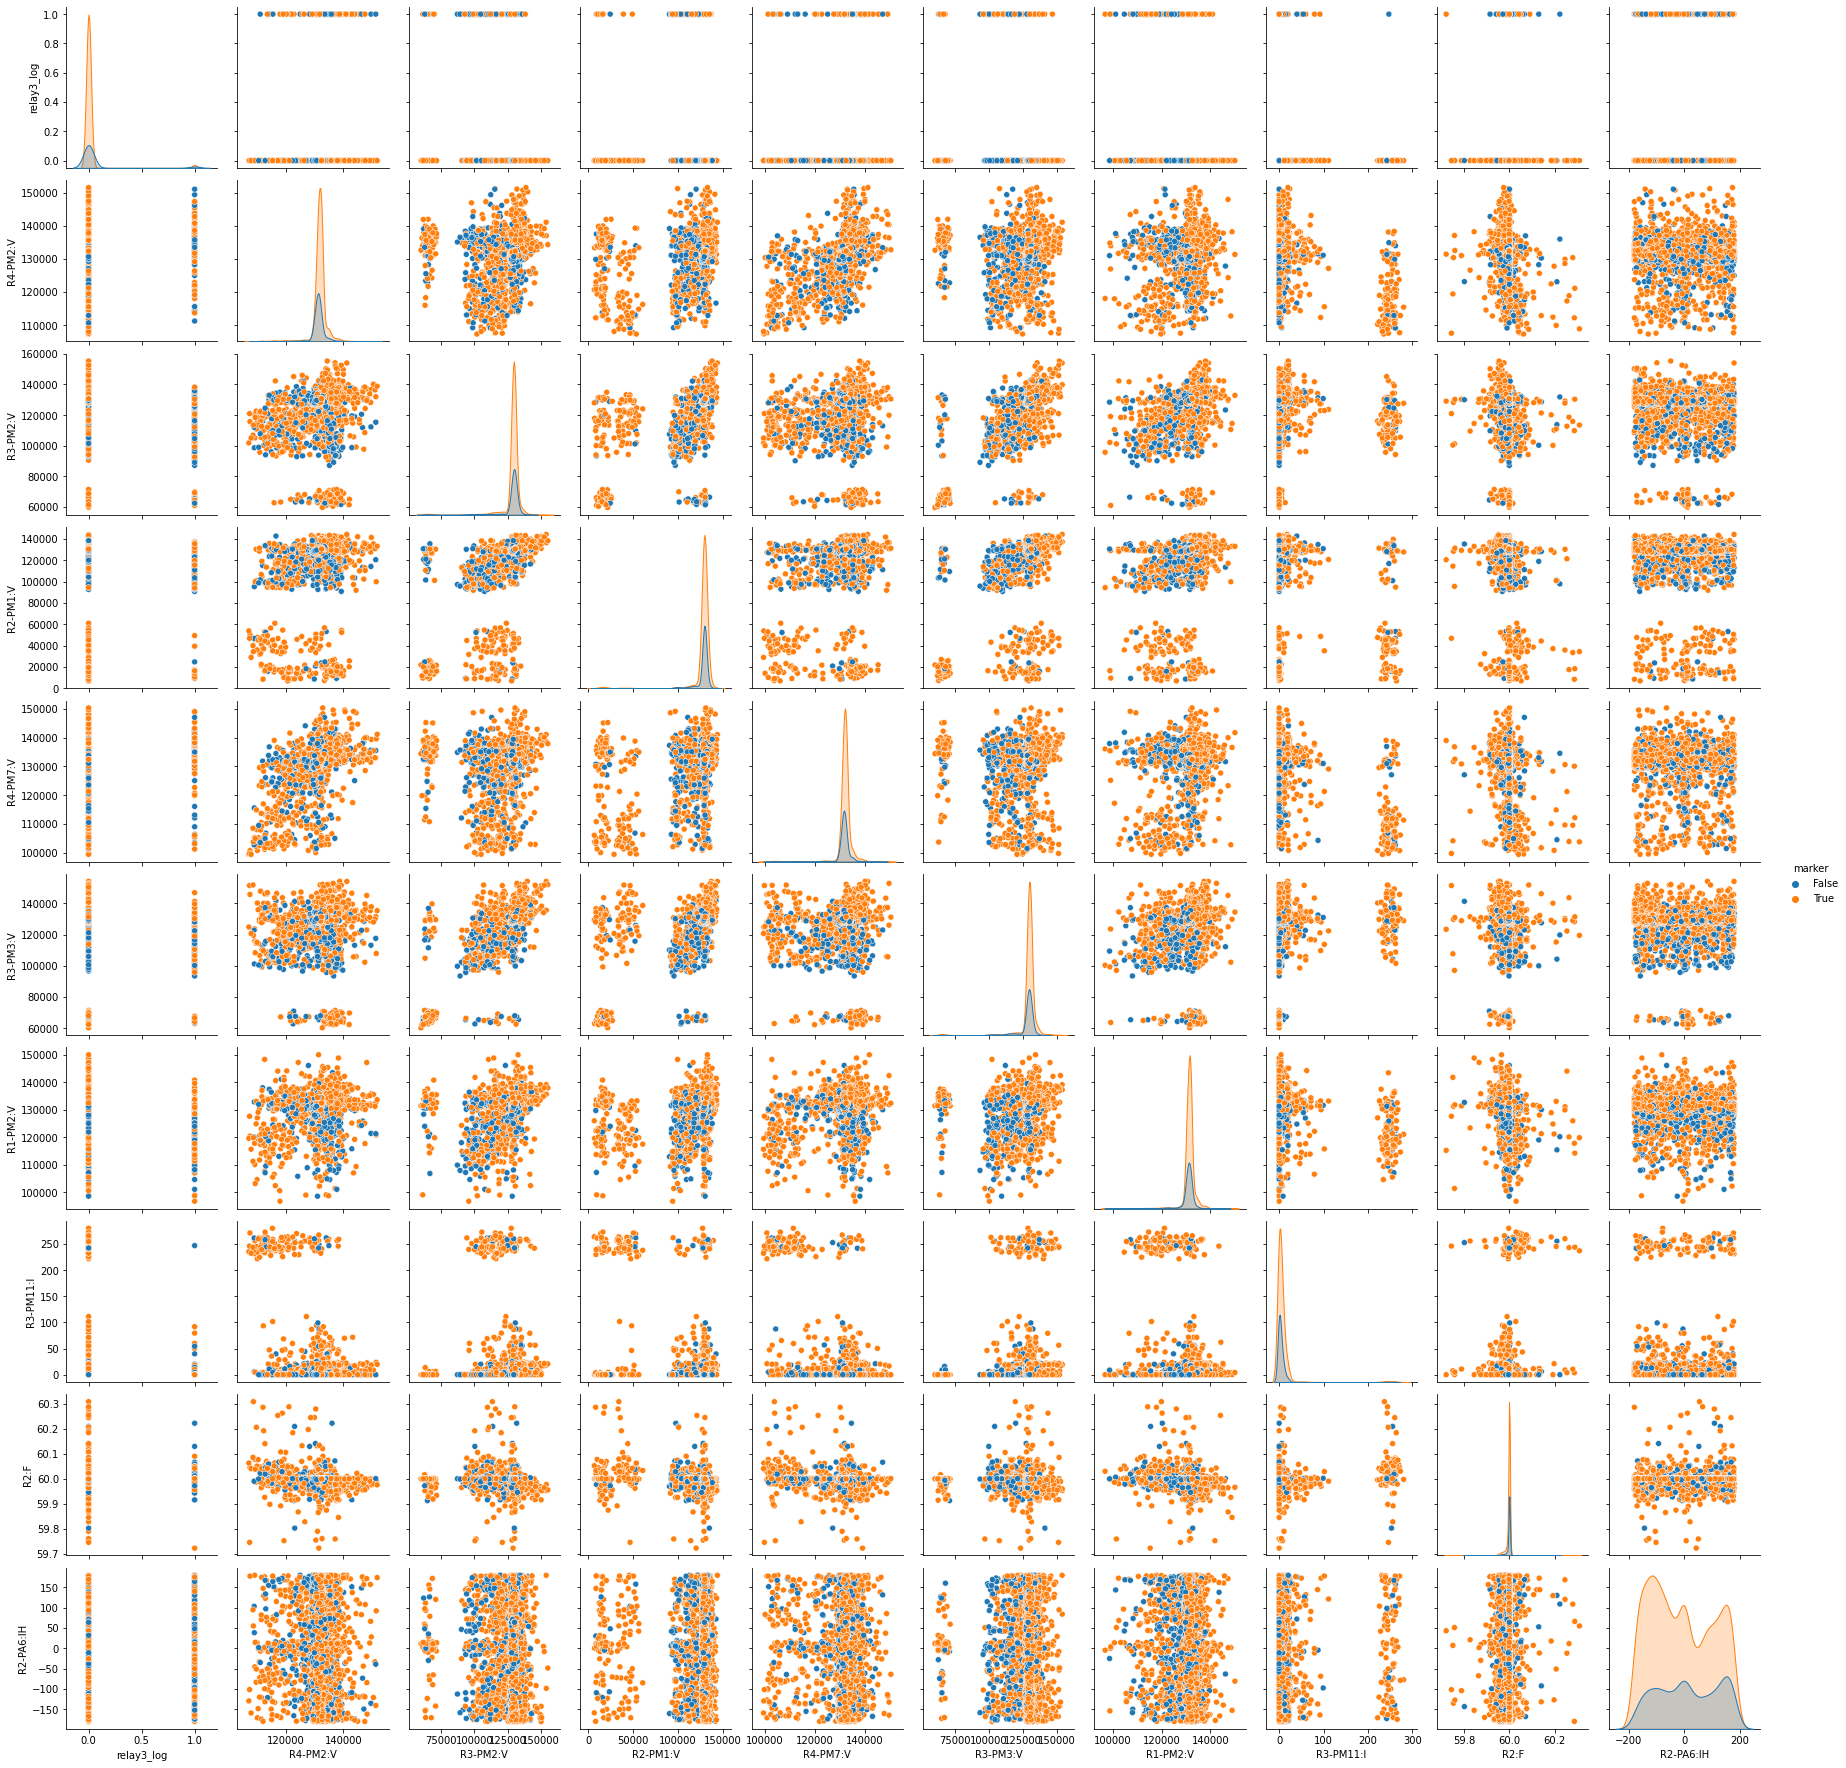

In [12]:
df = input_df.sample(10000)
sns.pairplot(df[cols_to_plot], diag_kind='kde', hue='marker')
#sns.PairGrid(df, vars=cols_to_plot)